# Recurrent Neural Network - Tesla Stock Movement Prediction

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('TSLA_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values  # iloc method will take all rows and the second column "Open" to get numpy array of one column

In [3]:
len(training_set)

1258

In [4]:
type(training_set)

numpy.ndarray

In [5]:
training_set

array([[  42.972   ],
       [  42.950001],
       [  45.284   ],
       ...,
       [1109.48999 ],
       [1098.640015],
       [1061.329956]])

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) # scaler to have values between 0 and 1
training_set_scaled = sc.fit_transform(training_set) 

In [7]:
training_set_scaled

array([[0.00563517],
       [0.00561681],
       [0.00756474],
       ...,
       [0.89574271],
       [0.88668741],
       [0.85554872]])

### Creating a data structure with 60 timesteps and 1 output

In [8]:
#60 timesteps coresponding to 60 previos days which is about 3 months since each month has 20 business days
X_train = [] # input
y_train = [] # output
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
len(X_train), len(y_train)

(1198, 1198)

In [10]:
np.ndim(X_train)

2

In [11]:
np.ndim(y_train)

1

### Reshaping

In [12]:
# keras documentation : 3D tensor with shape [batch_size, timesteps, feature]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape[1]

60

In [14]:
X_train.shape[0]

1198

In [15]:
np.ndim(X_train)

3

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [17]:
regressor = Sequential() # sequence of layers

### Adding the first LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) # we will drop 20% of neurons

### Adding a second LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [23]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [24]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 90ms/step - loss: 0.0137
Epoch 2/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0028: 1s - loss: 0.0 - ETA: 1s -
Epoch 3/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0027
Epoch 4/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0027
Epoch 5/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0026
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0027
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0022
Epoch 9/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0026
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0019
Epoch 11/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0019
Epoch 12/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0

38/38 [==============================] - 4s 102ms/step - loss: 0.0011
Epoch 100/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0011


## Part 3 - Making the predictions and visualising the results

### Getting Test Data ( Real Stock Prices of January 2022)

In [25]:
dataset_test = pd.read_csv('TSLA_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [26]:
len(real_stock_price)

20

### Getting the predicted stock prices

In [27]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) # vertical concatination
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values #range of inputs we need
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): # 20 observations of test set + 60 timesteps
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #to get the original scale of the scaled predicted value

In [28]:
predicted_stock_price

array([[1104.2113 ],
       [1110.0204 ],
       [1134.5154 ],
       [1144.61   ],
       [1120.5103 ],
       [1091.2075 ],
       [1049.3325 ],
       [1027.8408 ],
       [1033.4481 ],
       [1062.4653 ],
       [1067.3368 ],
       [1057.1764 ],
       [1048.4297 ],
       [1035.619  ],
       [1020.2688 ],
       [ 985.047  ],
       [ 950.315  ],
       [ 935.23944],
       [ 933.11035],
       [ 913.3836 ]], dtype=float32)

### Visualising the results

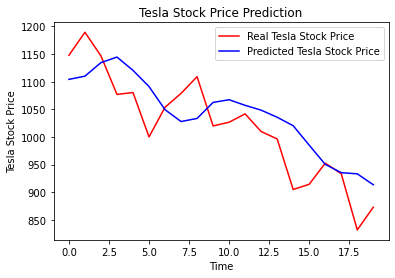

In [29]:
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()